In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

color = sns.color_palette()

data_path = "../input/"
train_file = data_path + "train_ver2.csv"
test_file = data_path + "test_ver2.csv"

**Dataset Size:**

In [2]:
train = pd.read_csv(data_path+train_file, usecols=['ncodpers'])
test = pd.read_csv(data_path+test_file, usecols=['ncodpers'])
print("Number of rows in train : ", train.shape[0])
print("Number of rows in test : ", test.shape[0])

Number of rows in train :  13647309
Number of rows in test :  929615


**No of Unique Customers:**

In [3]:
train_unique_customers = set(train.ncodpers.unique())
test_unique_customers = set(test.ncodpers.unique())
print("Number of customers in train : ", len(train_unique_customers))
print("Number of customers in test : ", len(test_unique_customers))
print("Number of common customers : ", len(train_unique_customers.intersection(test_unique_customers)))

Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


**Count of occurrences of each of the customers in train set**

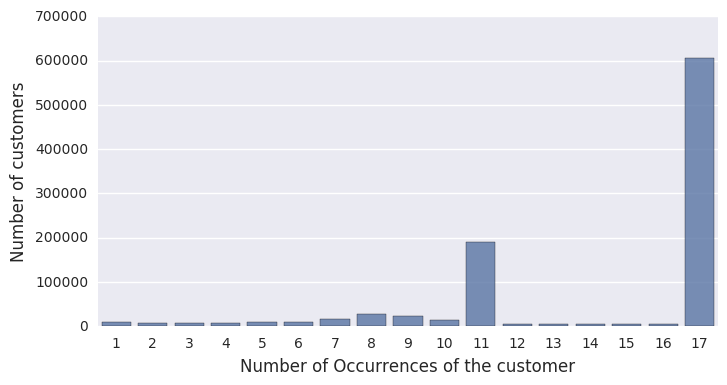

In [4]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color=color[0])
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()

In [5]:
del train_unique_customers
del test_unique_customers

**Target Variables distribution:**

There are 24 target variables present in this dataset are as follows:

1. ind_ahor_fin_ult1	  - Saving Account

2. ind_aval_fin_ult1	  - Guarantees

3. ind_cco_fin_ult1	  - Current Accounts

4. ind_cder_fin_ult1	  - Derivada Account

5. ind_cno_fin_ult1	  - Payroll Account

6. ind_ctju_fin_ult1	  - Junior Account

7. ind_ctma_fin_ult1 - Más particular Account

8. ind_ctop_fin_ult1 - particular Account

9. ind_ctpp_fin_ult1 - particular Plus Account

10. ind_deco_fin_ult1 - Short-term deposits

11. ind_deme_fin_ult1 - Medium-term deposits

12. ind_dela_fin_ult1 - Long-term deposits

13. ind_ecue_fin_ult1 - e-account

14. ind_fond_fin_ult1 - Funds

15. ind_hip_fin_ult1 - Mortgage

16. ind_plan_fin_ult1 - Pensions

17. ind_pres_fin_ult1 - Loans

18. ind_reca_fin_ult1 - Taxes

19. ind_tjcr_fin_ult1 - Credit Card

20. ind_valo_fin_ult1 - Securities

21. ind_viv_fin_ult1 - Home Account

22. ind_nomina_ult1 - Payroll

23. ind_nom_pens_ult1 - Pensions

24. ind_recibo_ult1 - Direct Debit


In [6]:
train = pd.read_csv(data_path+"train_ver2.csv", dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

**To check the number of times the given product has been bought in the train dataset**

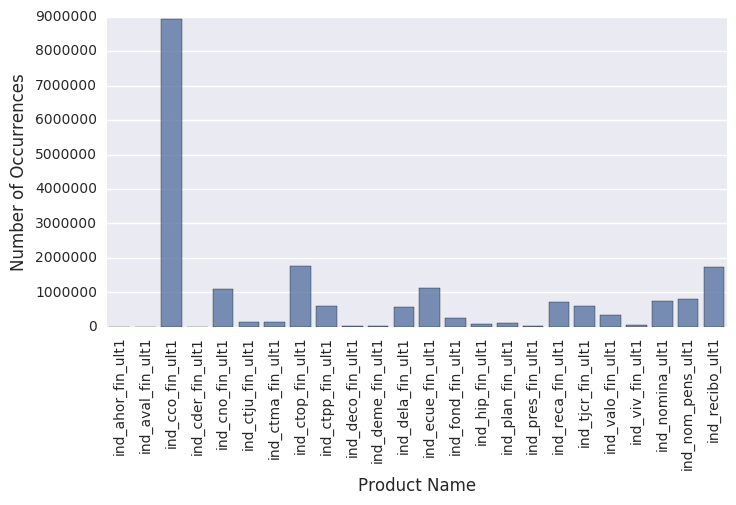

In [7]:
target_counts = train.astype('float64').sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Exploring Dates:**

fecha_dato - The date of observation

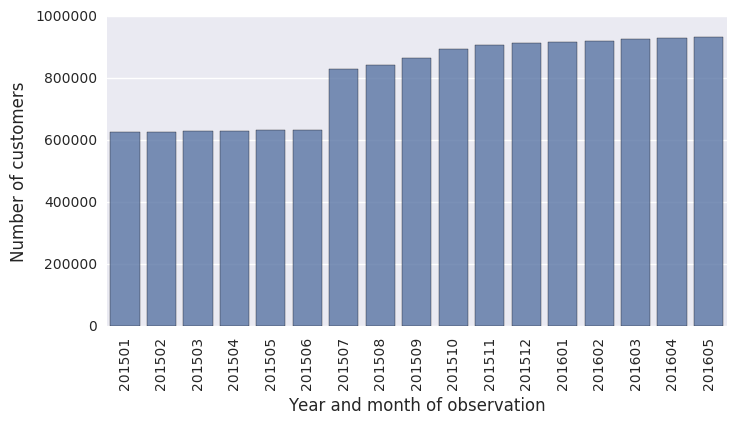

In [8]:
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['fecha_dato', 'fecha_alta'], parse_dates=['fecha_dato', 'fecha_alta'])
train['fecha_dato_yearmonth'] = train['fecha_dato'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_dato_yearmonth'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[0])
plt.xlabel('Year and month of observation', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Exploring Data**
fecha_alta - The date in which the customer became as the first holder of a contract in the bank

In [ ]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_alta_yearmonth'].value_counts()
print("Minimum value of fetcha_alta : ", min(yearmonth.index))
print("Maximum value of fetcha_alta : ", max(yearmonth.index))

plt.figure(figsize=(12,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

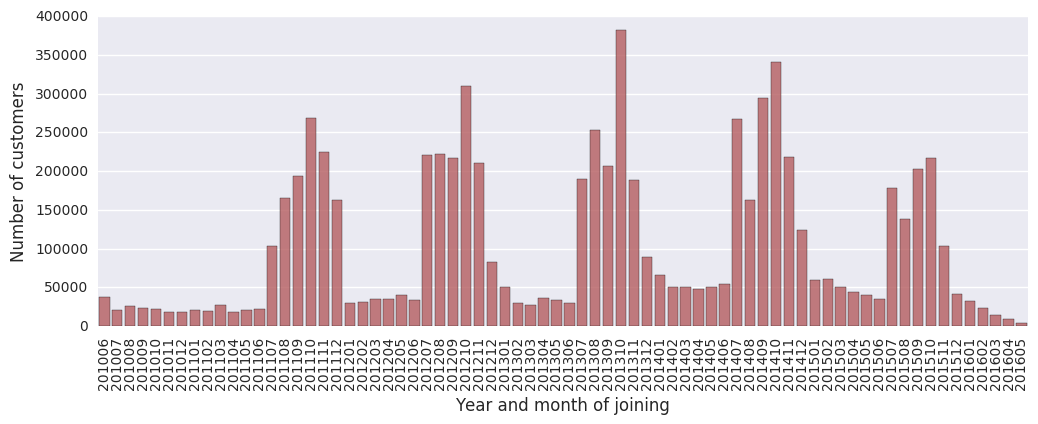

In [10]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[185:]
year_month.columns = ['yearmonth', 'number_of_customers']

plt.figure(figsize=(12,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color=color[2])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Numerical variables exploration:**

1. Age
2. Antiguedad - customer seniority
3. Renta


In [11]:
train = pd.read_csv(train_file, usecols=['age'])
train.head()

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age
0,35
1,23
2,23
3,22
4,23


In [13]:
train['age'] = train['age'].replace(to_replace=[' NA'], value=np.nan)

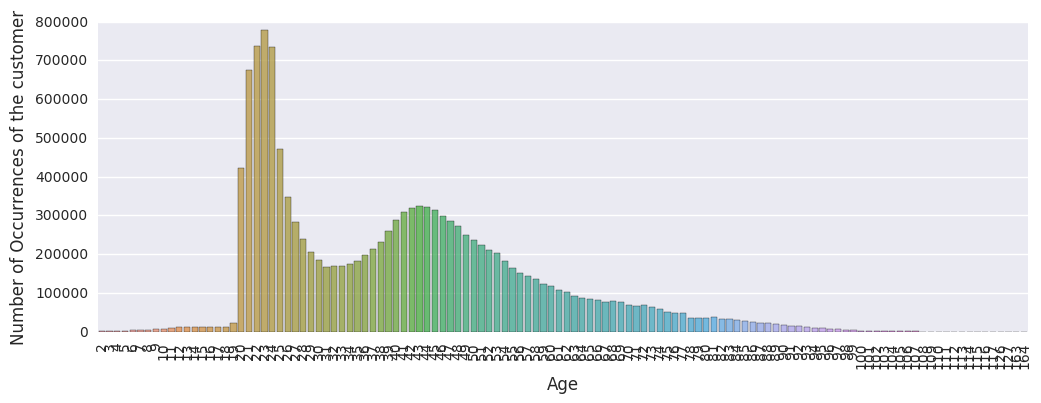

In [14]:
train['age'] = train['age'].astype('float64')

age_series = train.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
train.age.isnull().sum()

27734

In [16]:
train.age.mean()

40.18146491355274

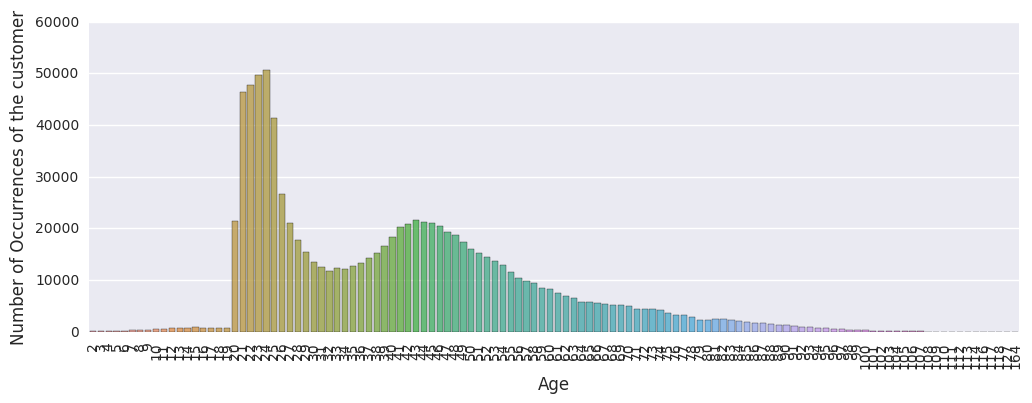

In [17]:
test = pd.read_csv(test_file, usecols=['age'])
test['age'] = test['age'].replace(to_replace=[' NA'], value=np.nan)
test['age'] = test['age'].astype('float64')

age_series = test.age.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(age_series.index.astype('int'), age_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
train = pd.read_csv(train_file, usecols=['antiguedad'])
train.head()

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,antiguedad
0,6
1,35
2,35
3,35
4,35


In [20]:
train['antiguedad'] = train['antiguedad'].replace(to_replace=['     NA'], value=np.nan)
train.antiguedad.isnull().sum()

27734

In [21]:
train['antiguedad'] = train['antiguedad'].astype('float64')
(train['antiguedad'] == -999999.0).sum()

38

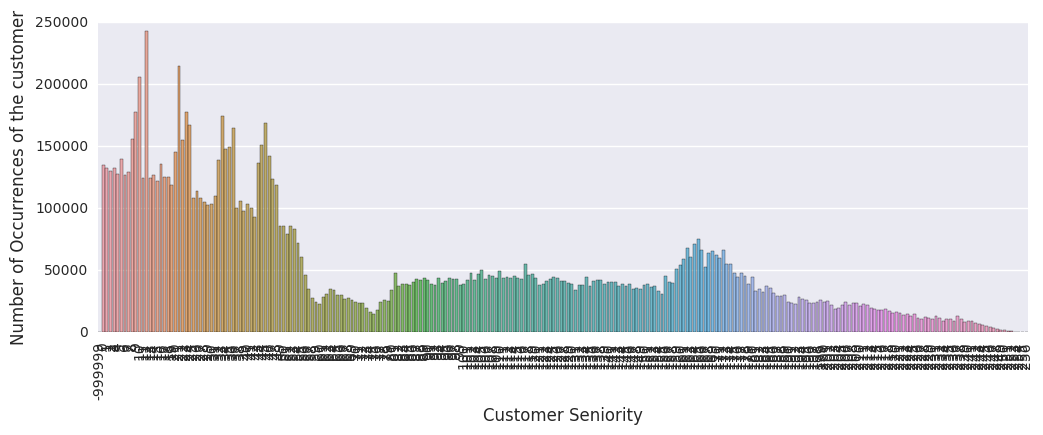

In [22]:
col_series = train.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

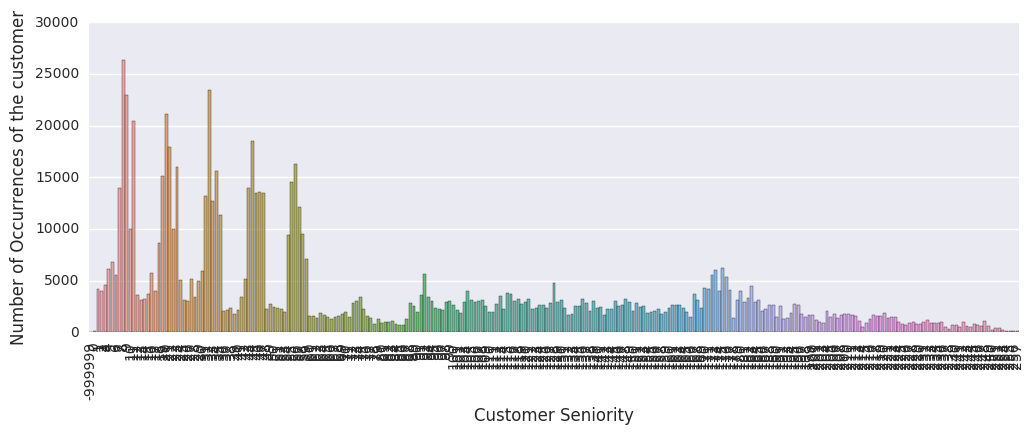

In [23]:
test = pd.read_csv(test_file, usecols=['antiguedad'])
test['antiguedad'] = test['antiguedad'].replace(to_replace=[' NA'], value=np.nan)
test['antiguedad'] = test['antiguedad'].astype('float64')

col_series = test.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
train = pd.read_csv(train_file, usecols=['renta'])
train.head()

,renta
0,87218.10
1,35548.74
2,122179.11
3,119775.54
4,NaN


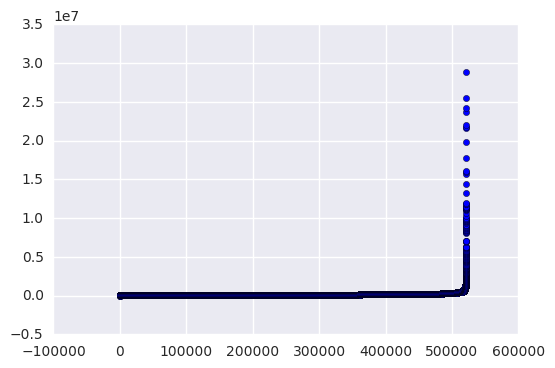

In [25]:
unique_values = np.sort(train.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

In [26]:
train.renta.mean()

134254.3182380867

In [27]:
train.renta.median()

101850.0

In [28]:
train.renta.isnull().sum()

2794375

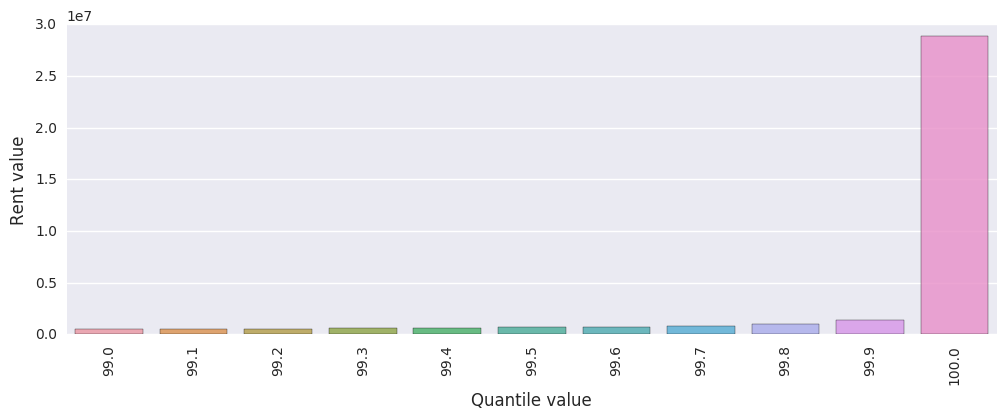

In [29]:
train.fillna(101850., inplace=True) #filling NA as median for now
quantile_series = train.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

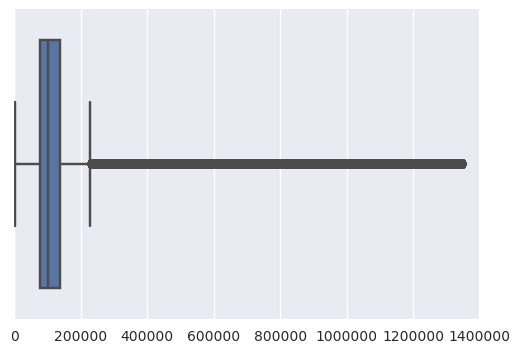

In [30]:
rent_max_cap = train.renta.quantile(0.999)
train['renta'][train['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(train.renta.values)
plt.show()

From the box plot, we can see that most of the rent values fall between 0 and 300,000.

Now we can see the distribution of rent in test data as well.

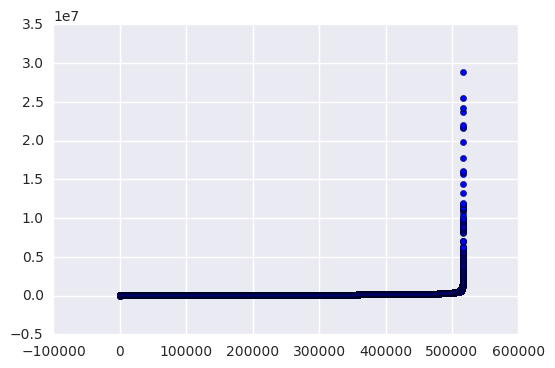

In [31]:
test = pd.read_csv(test_file, usecols=['renta'])
test['renta'] = test['renta'].replace(to_replace=['         NA'], value=np.nan).astype('float') # note that there is NA value in test
unique_values = np.sort(test.renta.unique())
plt.scatter(range(len(unique_values)), unique_values)
plt.show()

*Please note that there is a new value '   NA' present in the test data set while it is not in train data.*

The distribution looks similar to train though.

In [32]:
test.renta.mean()

134087.87059462993

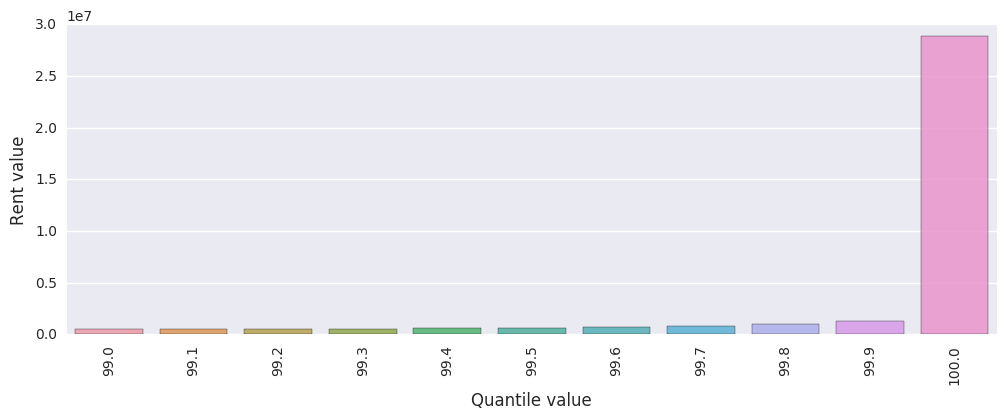

In [33]:
test.fillna(101850., inplace=True) #filling NA as median for now
quantile_series = test.renta.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Rent value', fontsize=12)
plt.xlabel('Quantile value', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

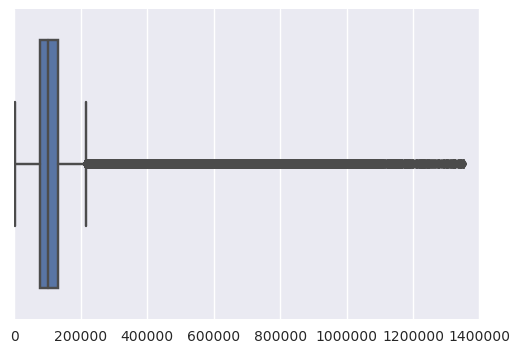

In [34]:
test['renta'][test['renta']>rent_max_cap] = 101850.0 # assigining median value 
sns.boxplot(test.renta.values)
plt.show()

Hope this one is helpful.!